In [2]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from sklearn.decomposition import PCA

### Reconocimiento facial con PCA

In [5]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=101)

# Divide the set of labeled images into a training and a test set.
train_faces = dataset.data[:350, :]
test_faces = dataset.data[350:, :]
train_answers = dataset.target[:350]
test_answers = dataset.target[350:]

n_components = 25  # The decomposition creates n_components new variables
# The whitening option removes some constant noise from images.
Rpca = PCA(n_components=n_components, whiten=True)
Rpca.fit(train_faces)
print('Explained variance by %i components: %.3f'
      % (n_components, np.sum(Rpca.explained_variance_ratio_)))
compressed_train_faces = Rpca.transform(train_faces)
compressed_test_faces = Rpca.transform(test_faces)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\pablo\scikit_learn_data
Explained variance by 25 components: 0.794


The represented person is subject 17


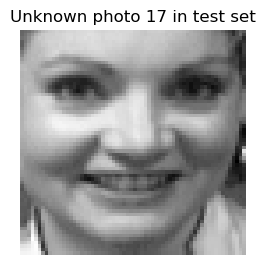

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

photo = 17  # choose a photo from the test set
print('The represented person is subject %i' % photo)  # we know the associated person ID.

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Unknown photo ' + str(photo) + ' in test set')
plt.imshow(test_faces[photo].reshape(64, 64),
           cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [9]:
# From the compressed test set, take the data associated with photo,
# and subtract it from the compressed training set.
mask = compressed_test_faces[photo]
squared_errors = np.sum((compressed_train_faces - mask)**2, axis=1)
# The most similar photos are the ones with the least-squared errors.
minimum_error_face = np.argmin(squared_errors)
most_resembling = list(np.where(squared_errors < 20)[0])
print('Best resembling subject in training set: %i' % minimum_error_face)

Best resembling subject in training set: 170


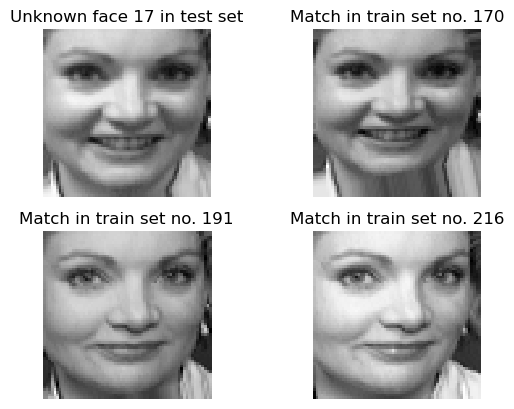

In [11]:
# Let's display photo 17 from the test set together with
# the top three resembling images from the training set.
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Unknown face ' + str(photo) + ' in test set')
plt.imshow(test_faces[photo].reshape(64, 64),
           cmap=plt.cm.gray, interpolation='nearest')

for k, m in enumerate(most_resembling[:3]):
    plt.subplot(2, 2, 2 + k)
    plt.title('Match in train set no. ' + str(m))
    plt.axis('off')
    plt.imshow(train_faces[m].reshape(64, 64),
               cmap=plt.cm.gray, interpolation='nearest')

plt.show()

### Comentario

En este ejercicio se trabaja con el dataset Olivetti Faces, que contiene imágenes faciales de 40 personas diferentes. El objetivo es reducir la dimensionalidad de las imágenes utilizando PCA para captar la mayor varianza posible con menos variables.

Primero, se realiza la transformación y reducción de las imágenes con PCA, seleccionando 25 componentes principales que explican aproximadamente el 79.4% de la varianza total. Esto significa que gran parte de la información original se conserva en un espacio de menor dimensión, facilitando el análisis y comparación.

A continuación, se selecciona una imagen desconocida del conjunto de prueba y se muestra visualmente. Posteriormente, se calcula la similitud entre esta imagen comprimida y las imágenes del conjunto de entrenamiento usando el error cuadrático mínimo. Se identifica la imagen del entrenamiento más parecida a la imagen de prueba.

Finalmente, se muestran juntas la imagen de prueba y las tres imágenes más similares encontradas en el conjunto de entrenamiento. Esto permite verificar visualmente cómo el método PCA combinado con la comparación por error cuadrático es capaz de reconocer a la misma persona en diferentes imágenes, incluso si varían la pose o la iluminación. La imagen más similar resulta ser simplemente una versión escalada de la imagen de prueba, lo que confirma la eficacia del método.

### Extracción de temas con NMF

In [15]:
# Goal: to extract topics and keywords from a collection of texts.
# Use the fetch_20newsgroups dataset, which contains posts.
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle = True,
                             categories = ['misc.forsale'],
                             remove = ('headers', 'footers', 'quotes'),
                             random_state = 101)

print('Posts: %i' % len(dataset.data))

# Use the non-negative matrix factorization (NMF) decomposition algorithm.
# The TfidfVectorizer class is used to remove stop (common) words such as 'the' or 'and'.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2,
                             stop_words = 'english')
tfidf = vectorizer.fit_transform(dataset.data)
n_topics = 5 # Set how many topics to extract.
nmf = NMF(n_components = n_topics, random_state = 101).fit(tfidf)

Posts: 585


In [27]:
feature_names = vectorizer.get_feature_names_out()
n_top_words = 15  # set how many keywords to consider per topic.
# Show the topics in order, accompanied by their most representative keywords.
for topic_idx, topic in enumerate(nmf.components_):
    print('Topic #%d:' % (topic_idx + 1),)
    topics = topic.argsort()[:-n_top_words - 1:-1]
    print(' '.join([feature_names[i] for i in topics]))



Topic #1:
condition excellent asking offer best car old new sale 10 miles 000 tape cd power
Topic #2:
00 50 dos 20 10 15 cover 1st new 25 price man 40 shipping comics
Topic #3:
drive hard card floppy monitor meg ram disk motherboard vga modem brand scsi color internal
Topic #4:
email looking game games send interested mail thanks like edu good want package price list
Topic #5:
shipping vcr works stereo obo included amp plus great volume unc mathes gibbs radley remotes


In [29]:
# Show the indexes of the top representative words for the first topic.
print(nmf.components_[0,:].argsort()[:-n_top_words - 1:-1])

[1075 1459  632 2463  740  888 2476 2415 2987   10 2305    1 3349  923
 2680]


In [31]:
# Extract the keyword related to a specific word_index.
word_index = 2463
print(vectorizer.get_feature_names_out()[word_index])

offer
